In [9]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas
import pandas as pd
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1


In [5]:
vector.register_awkward() 

In [6]:
RUNS = [290323, 290327, 290848, 291361, 291360, 291362, 290853, 290860, 291373, 290374, 290375, 291399,
               291400, 290894, 290895, 290404, 291943, 291944, 291948, 291953, 290932, 290423, 291447, 290935, 
               290425, 290427, 291451, 291453, 291976, 291982, 290456, 290458, 290459, 291482, 291485, 290975, 
               290980, 290469, 292012, 291002, 291003, 291004, 291005, 290501, 292040, 292060, 292061, 292062, 
               291041, 290539, 290540, 292075, 292077, 292080, 290549, 290553, 291590, 292106, 292108, 292109, 
               292115, 290590, 291618, 291622, 291624, 292140, 290612, 292160, 292162, 292163, 292164, 292166, 
               290632, 291657, 292168, 292192, 290658, 290660, 291690, 291692, 291694, 291698, 291706, 290687, 
               290692, 290696, 290699, 292242, 292265, 291755, 292269, 292270, 291760, 292273, 292274, 290742, 
               291769, 291263, 290764, 290766, 291283, 291284, 291285, 291795, 291796, 290776, 291803, 290787]
SAMPLE_RUNS = sorted(RUNS)
print(len(SAMPLE_RUNS))

108


In [10]:
l1 = pandas.read_csv('../../data/counters.offline.csv')['run']
l1_online = pandas.read_csv('../../data/counters.online.csv')['run']
l2 = pandas.read_csv('../../data/counters.offline.csv')['cmul7all']
l2_online = pandas.read_csv('../../data/counters.online.csv')['duration(s)']

#print(l1)
type(l1)
#print(l2)
df = pd.concat([l1, l2], axis=1)
print(df) # Affichage du DataFrame

        run  cmul7all
0    290222      1119
1    290223       484
2    290254      7845
3    290293     44363
4    290297     33013
..      ...       ...
178  292270    239943
179  292273    652701
180  292274    271233
181  292298   1198474
182  292397    401941

[183 rows x 2 columns]


In [11]:
# Création d'un DataFrame à partir de la liste
dg = pd.DataFrame(SAMPLE_RUNS, columns=['RUNS'])

# Affichage du DataFrame
#print(dg)

list_cmul7all = l2.tolist()
list_run = l1.tolist()

list_duration = l2_online.tolist()
list_run_online = l1_online.tolist()

#print(list_cmul7all) #Je veux trouver comme premier terme dans ma liste si ça marche 432808 et taille de 108
#print(list_run) 
print(len(list_run))
print(len(list_cmul7all))

print(len(list_duration), len(list_run_online))

183
183
187 187


In [12]:
CMUL = [];
for run in list_run :
    for r in SAMPLE_RUNS :
        if run == r :
            id= list_run.index(run);
            CMUL.append(list_cmul7all[id])
print(CMUL)
print(len(CMUL))

DURATION = [];
for run in list_run_online :
    for r in SAMPLE_RUNS :
        if run == r :
            id= list_run_online.index(run);
            DURATION.append(list_duration[id])
print(DURATION)
print(len(DURATION))



[432808, 37273, 217415, 87077, 518069, 188644, 498452, 175876, 101428, 58328, 940211, 584407, 706888, 293232, 257752, 427804, 336790, 512221, 137250, 123945, 41378, 482043, 538639, 686695, 283526, 235635, 445373, 202125, 205282, 248365, 225384, 552394, 289412, 855309, 158618, 62493, 276363, 175878, 465352, 68737, 378599, 432698, 574342, 200522, 762074, 993712, 220329, 469502, 84940, 610567, 118664, 437174, 89818, 211016, 224580, 336334, 215792, 855122, 535739, 104828, 415679, 210695, 195126, 358265, 273510, 123844, 204881, 240810, 236379, 465680, 397680, 9061, 468452, 65661, 113708, 149339, 466758, 326012, 551957, 729727, 439352, 337714, 347433, 540695, 390330, 265127, 794599, 468276, 197207, 297272, 269977, 233300, 196129, 634608, 43134, 835711, 53616, 282593, 53202, 217338, 399372, 50064, 180771, 182338, 45971, 239943, 652701, 271233]
108
[8563, 739, 4405, 2044, 8316, 3559, 9900, 3088, 1586, 1317, 15777, 9969, 16630, 4780, 4227, 7339, 5400, 8416, 1979, 1972, 664, 7703, 9702, 13023, 5

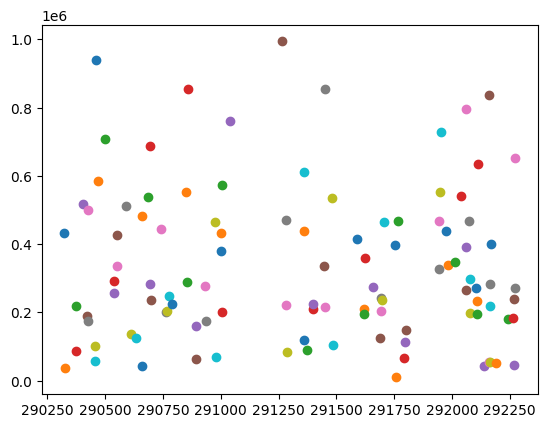

In [13]:
for i in range (0,len(SAMPLE_RUNS)) :
    plt.scatter(SAMPLE_RUNS[i], CMUL[i])
plt.show()

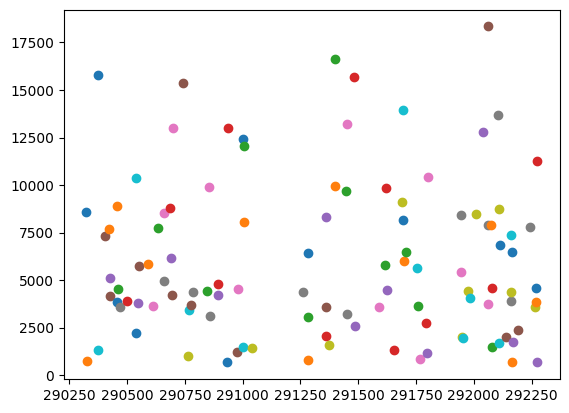

In [51]:
for i in range (0,len(SAMPLE_RUNS)) :
    plt.scatter(SAMPLE_RUNS[i], DURATION[i])
plt.show()